In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import pickle

from importlib import reload


import sys
sys.path.append("..") 
import postpro_centrality_certainty as postpro
reload(postpro)

colors = {'dodger_blue':'#258BFE',
          "kelly_green":'#00B514',
          "burnt_sienna":'#ED6D49',
          "feldgrau":'#466362',
          "berkeley_blue":'#052F5F',
          "forest_green":'forestgreen'}


Load the data + define Result folder to get the data from

In [2]:
from importlib import reload
reload(postpro)

default_path = "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/hpc_mount/"

# # command for mounting hpc 
#  sshfs m.raoufi.s@gateway.hpc.tu-berlin.de:/home/users/m/m.raoufi.s/colab/collective-decison-making-with-direl/results /home/mohsen/Project/colab/collective-decison-making-with-direl/results/hpc_mount/


experiment_name = ("N100_2023-09-30-01-13-40_correlation_search_Bayes_centralized_random_fixed_mdeg/results/"
                   "envstd_0_mnint_0_mncenter_0_np1_19_ow_0_a_n_0_corr_0_run_96")

experiment_name = "N100_2023-09-15-18-09-46_certainty_search_Bayes_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_7_ow_0_a_n_0_run_64"

experiment_folder_path = default_path + "/" + experiment_name 

# For the local test cases
# experiment_folder_path = "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test/width_1.0" # 0.8723065458990669"

df_tmp = None
df_tmp = postpro.post_pro_network_centrality_certainty(experiment_folder_path)
# postpro.draw_network_color_nodes_on_degree(nx.from_numpy_array(df_tmp.adjc_time[0]))
G = nx.from_numpy_array(df_tmp.adjc_time[0])
nx.draw_circular(G)
plt.axis('square')

FileNotFoundError: [Errno 2] No such file or directory: '/home/mohsen/Project/colab/collective-decison-making-with-direl/results/hpc_mount//N100_2023-09-15-18-09-46_certainty_search_Bayes_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_7_ow_0_a_n_0_run_64/data.pickle5'

Plot uncertainty over time

In [3]:
%matplotlib inline
# %matplotlib qt 
def plot_uncertainty_vs_time(df_tmp, ax=None, fig=None, legend_all=True, legend_single=False, labels=False):
    if ax is None:
        ax, fig = plt.subplots(figsize=(10, 5))
    uncertainty_central_node = []
    uncertainty_peripheral_node = []
    uncertainty_all_nodes = []
    uncertainty_avg_nodes = []
    for time_ind in df_tmp.Timestep[1:]:
        # update centrality every time step
        # uncertainty_central_node.append(df_tmp.uncertainty_central_node[time_ind])
        # uncertainty_peripheral_node.append(df_tmp.uncertainty_peripheral_node[time_ind])

        # take the initial centrality measures
        uncertainty_central_node.append(df_tmp.uncertainty_init_central_node[time_ind])
        uncertainty_peripheral_node.append(df_tmp.uncertainty_init_peripheral_node[time_ind])
        uncertainty_all_nodes.append(df_tmp.uncertainty_time[time_ind][:])
        uncertainty_avg_nodes.append(np.mean(df_tmp.uncertainty_avg_nodes[time_ind]))

        ax_sctr = ax.scatter((time_ind-1)*(np.ones(len(df_tmp.z_arr_time[time_ind][:]))) + 0.1*np.random.rand(len(df_tmp.z_arr_time[time_ind][:])),
                    df_tmp.uncertainty_time[time_ind][:], s=20, alpha=0.2, color=colors['berkeley_blue'], zorder=1, label='All nodes')
        # plt_sctr = plt.scatter((time_ind-1)*(np.ones(len(df_tmp.z_arr_time[time_ind][:]))) + 0.1*np.random.rand(len(df_tmp.z_arr_time[time_ind][:])),
        #             df_tmp.uncertainty_time[time_ind][:], s=20, alpha=0.2, color=colors['berkeley_blue'], zorder=10, ax=ax)
        
        # ax.plot(time_ind-1, df_tmp.uncertainty_init_central_node[time_ind], '*', color='firebrick', zorder=1)

    # palette = sns.color_palette("dark:#5A9_r",n_colors=10) # , as_cmap=True)
    # Plot with stripplot with fixed colors
    
    # sns.stripplot(data=uncertainty_all_nodes, jitter=0.1, size=4, alpha=0.2, color='deepskyblue', ax=ax) # palette="dark:#5A9_r") # palette) # 'dark:c')

    lw = 3

    #xxxxx #DCE320 #209EE3

    ax_avg_nd = ax.plot(uncertainty_avg_nodes, '-', color=colors['dodger_blue'], label='Collective average', alpha=0.9, zorder=3, lw = lw)
    ax_centr_nd = ax.plot(uncertainty_central_node, '-*', color=colors['burnt_sienna'], label='Central node', alpha=0.9, markersize = 10, zorder=1, lw = lw)
    ax_perif_nd = ax.plot(uncertainty_peripheral_node, '-o', color=colors['forest_green'], label='Peripheral node', alpha=0.9, zorder=2, lw = lw)

    # plt_avg_nd = plt.plot(uncertainty_avg_nodes, '-', color=colors['dodger_blue'], label='average uncertainty', alpha=0.9, zorder=3, lw = lw, ax=ax)
    # plt_centr_nd = plt.plot(uncertainty_central_node, '-*', color=colors['burnt_sienna'], label='central node', alpha=0.9, markersize = 10, zorder=1, lw = lw, ax=ax)
    # plt_perif_nd = plt.plot(uncertainty_peripheral_node, '-o', color=colors['feldgrau'], label='peripheral node', alpha=0.9, zorder=2, lw = lw, ax=ax)


    if(labels):
        ax.set_xlabel('Time')
        ax.set_ylabel('Uncertainty')
    ax.set_yscale("log")
    ax.set_facecolor('white')
    # fig.set_facecolor('white')
    # plt.ylim([1e-14, 1e-3])
    # print(plt.ylim())
    if(legend_all):
        lines, labelss = ax.get_legend_handles_labels()
        # legend in 3 columns, outside above the plot
        ax.legend(lines[-4:-1], labelss[-4:-1], ncol=3, bbox_to_anchor=(0.5, 1.55), loc='upper center', fontsize=14)

        # ax.legend([ax_sctr, ax_avg_nd, ax_centr_nd], ncol=3, bbox_to_anchor=(0.5, 1.25), loc='upper center', fontsize=14)
        # ax.legend([plt_sctr, plt_avg_nd, plt_centr_nd], ncol=3, bbox_to_anchor=(0.5, 1.25), loc='upper center', fontsize=14)
    elif(legend_single):
        lines, labelss = ax.get_legend_handles_labels()
        ax.legend([lines[-1]], [labelss[-1]], fontsize=14, loc='lower right')
        # ax.legend([plt_perif_nd], fontsize=14)
        # ax.legend()
    # print("!! The very first uncenrtainty is skipped in the plot!!")

    ax.xaxis.set_major_locator(plt.MaxNLocator(6))

    ax.set_xticklabels([])

# fig, ax = plt.subplots(figsize=(10, 5))
# plot_uncertainty_vs_time(df_tmp, ax=ax, fig=fig)

Plot opinions over time

In [4]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

def plot_opinion_vs_time(df_tmp, ax=None, fig=None, show_shifter=False, legend=True, labels=False, ticks=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))

    z_central_node = []
    z_all = []
    centrality_all = []
    uncertainty_all = []
    z_peripheral_node = []

    for time_ind in df_tmp.Timestep[1:]:
        z_all.append(df_tmp.z_arr_time[time_ind][:])
        centrality_all.append(df_tmp.centrality_time[time_ind][:])
        z_central_node.append(df_tmp.z_arr_time[time_ind][df_tmp.ind_central_node_arr[time_ind]])
        z_peripheral_node.append(df_tmp.z_arr_time[time_ind][df_tmp.ind_peripheral_node_arr[time_ind]])
        uncertainty_all.append(df_tmp.uncertainty_time[time_ind][:])

        certainty_tmp = 1/uncertainty_all[-1]
        certainty_tmp = certainty_tmp/np.max(certainty_tmp)

        uncertainty_tmp = uncertainty_all[-1]
        uncertainty_tmp = uncertainty_tmp/np.max(uncertainty_tmp)
        # ax.scatter((time_ind-1)*(np.ones(len(df_tmp.z_arr_time[time_ind][:])) + 0.05*np.random.rand(len(df_tmp.z_arr_time[time_ind][:]))), 
        #             z_all[-1], s=100*centrality_all[-1]**0.5, alpha=0.4, c=certainty_tmp, cmap='magma', edgecolors='none') # size as centrality
        
        ax.scatter((time_ind-1)*(np.ones(len(df_tmp.z_arr_time[time_ind][:]))) + 0.1*np.random.rand(len(df_tmp.z_arr_time[time_ind][:])),  
                    z_all[-1], alpha=0.4, c=colors['berkeley_blue'], edgecolors='none', zorder=1) # size as centrality

        # plt.scatter((time_ind-1)*np.ones(len(df_tmp.z_arr_time[time_ind][:])), z_all[-1], s=20*certainty_tmp, alpha=0.4, c=centrality_all[-1], edgecolors='none') # size as certainty
        # plt.scatter((time_ind-1)*np.ones(len(df_tmp.z_arr_time[time_ind][:])), z_all[-1], s=20*uncertainty_tmp, alpha=0.4, c=centrality_all[-1], edgecolors='none') # size as uncertainty

    palette = sns.color_palette("blend:#7AB,#EDA",n_colors=1)
    # sns.stripplot(data=z_all, jitter=0.1, size=20*centrality_all[0]**0.5,  alpha=0.4, palette=palette); # Centrality as size

    # sns.stripplot(data=z_all, jitter=0.1, size=200*uncertainty_all[0],  alpha=0.4, palette=palette); # Centrality as size

    lw = 3

    ax.plot(z_all, 'k-', alpha=0.05, zorder=2)
    ax.plot(np.mean(z_all, axis=1), '-', color=colors['dodger_blue'], alpha=0.9, label='Average opinion', lw = lw, zorder=3)
    # plot shifted z_central by 1 index
    z_central_shifted = np.roll(z_central_node,1)
    z_central_shifted[0] = np.nan
    ax.plot(z_central_node, '-*', color=colors['burnt_sienna'], label='Central node', alpha=0.9, markersize=8, lw = lw, zorder=5) #0.5)

    # ax.plot(z_peripheral_node,'-o', color=colors['forest_green'], label='peripheral node', alpha=0.9, markersize=8/2, lw = lw/2, zorder=2)

    if show_shifter:
        ax.plot(z_central_shifted, '-o', color='deepskyblue', markersize=4, label='central node shifted',alpha=0.9, zorder=6) # 0.5)

    if(labels):
        ax.set_xlabel('Time')
        ax.set_ylabel('Opinions $x^[i]$')

    
    ax.set_facecolor('white')
    # fig.set_facecolor('white')
    if legend:
        ax.legend()
    # print("!! The very first time index is skipped in the plot!!")

    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    

    # set minor ticks to be 5% of the major ticks
    #
    # ax.xaxis.set_minor_locator(plt.Mi(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    
    # print("ticks: ", ticks)
    if(ticks):
        # bring back xticklabels
        # print("TICKS!! ax.get_xticks(): ", ax.get_xticks(), flush=True)
        # format the xtickslabel as integers.
        ax.set_xticklabels(ax.get_xticks().astype(int))
    else:
        # remove xticklabels    
        ax.set_xticklabels([])
        # print("removing ticks!")

    # draw a horizontal line at y=0 in the background with alpha, and in green color
    ax.axhline(y=0, color='k', alpha=.5, linestyle='--', zorder=0, lw=0.5)

# fig, ax = plt.subplots(figsize=(10, 5))
# plot_opinion_vs_time(df_tmp, ax=ax, fig=fig)

Plot a few figures together

In [8]:
reload(postpro)

default_path = "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/hpc_mount/"

# experiment_folder_path_list = [
#     "N100_2023-09-30-01-13-40_correlation_search_Bayes_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_1_ow_0_a_n_0_corr_0_run_96",
#     "N100_2023-09-30-01-13-40_correlation_search_Bayes_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_9_ow_0_a_n_0_corr_0_run_96",
#     "N100_2023-09-30-01-13-40_correlation_search_Bayes_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_19_ow_0_a_n_0_corr_0_run_96",
# ]

# Bayes
experiment_folder_path_list_bayes = [
    # "N100_2023-09-15-18-09-46_certainty_search_Bayes_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_0_ow_0_a_n_0_run_64",
    # "N100_2023-09-15-18-09-46_certainty_search_Bayes_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_4_ow_0_a_n_0_run_64",
    # "N100_2023-09-15-18-09-46_certainty_search_Bayes_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_9_ow_0_a_n_0_run_64",
    # following for the paper
    # "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test/Bayes_np_0_ow_0",
    # "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test/Bayes_np_1_ow_0",
    # "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test/Bayes_np_2_ow_0"
    # following for OB
    "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test_OB/Bayes_np_0_ow_0",
    "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test_OB/Bayes_np_1_ow_0",
    "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test_OB/Bayes_np_2_ow_0"
]

# Naiive
experiment_folder_path_list_naiive = [
    # "N100_2023-09-15-16-19-36_certainty_search_Naive_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_0_ow_1_a_n_0_run_64",
    # "N100_2023-09-15-16-19-36_certainty_search_Naive_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_4_ow_1_a_n_0_run_64",
    # "N100_2023-09-15-16-19-36_certainty_search_Naive_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_9_ow_1_a_n_0_run_64",
    # "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test/Naive_np_0_ow_0",
    # "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test/Naive_np_1_ow_0",
    # "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test/Naive_np_2_ow_0"
    "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test_OB/Naive_np_0_ow_0",
    "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test_OB/Naive_np_1_ow_0",
    "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test_OB/Naive_np_2_ow_0"
]

# Naiive Global OW
experiment_folder_path_list_naiive_GO = [
    # "N100_2023-09-15-16-19-36_certainty_search_Naive_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_0_ow_6_a_n_0_run_64",
    # "N100_2023-09-15-16-19-36_certainty_search_Naive_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_4_ow_6_a_n_0_run_64",
    # "N100_2023-09-15-16-19-36_certainty_search_Naive_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_9_ow_6_a_n_0_run_64",
    # "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test/Naive_np_0_ow_1",
    # "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test/Naive_np_1_ow_1",
    # "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test/Naive_np_2_ow_1"
    "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test_OB/Naive_np_0_ow_1",
    "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test_OB/Naive_np_1_ow_1",
    "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test_OB/Naive_np_2_ow_1"
]

# Naiive Local OW
experiment_folder_path_list_LO = [
    # "N100_2023-09-20-14-14-47_certainty_search_NaiveLO_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_0_ow_0_a_n_0_run_2", # 1
    # "N100_2023-09-20-14-14-47_certainty_search_NaiveLO_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_9_ow_0_a_n_0_run_2",
    # "N100_2023-09-20-14-14-47_certainty_search_NaiveLO_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_19_ow_0_a_n_0_run_2",
    # "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test/NaiveLO_np_0_ow_0",
    # "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test/NaiveLO_np_1_ow_0",
    # "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test/NaiveLO_np_2_ow_0"
    "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test_OB/NaiveLO_np_0_ow_0",
    "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test_OB/NaiveLO_np_1_ow_0",
    "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/test_OB/NaiveLO_np_2_ow_0"
]


# for experiment_folder_path in experiment_folder_path_list:
#     # remove the "/results/" from the path and save it as experiment_name use replace()
#     experiment_name = experiment_folder_path.replace("/results/", "")
#     experiment_folder_path = default_path + "/" + experiment_folder_path

#     # # find where the last / is in the path and use the rest of the path as the experiment name
#     # experiment_name = experiment_folder_path[experiment_folder_path.rfind('/')+1:]

    

#     df_tmp = None
#     df_tmp = postpro.post_pro_network_centrality_certainty(experiment_folder_path)

#     fig, ax = plt.subplots(figsize=(4, 4))
#     postpro.draw_network_color_nodes_on_degree(nx.from_numpy_array(df_tmp.adjc_time[0]), ax=ax)
#     fig.set_facecolor('white')
    
#     # fig, ax = plt.subplots(figsize=(10, 5))
#     # plot_uncertainty_vs_time(df_tmp, ax=ax, fig=fig)
#     # # save the figure
#     # fig.savefig('exp_figures/' + experiment_name+'_uncertainty_vs_time.png', bbox_inches='tight')

#     fig, ax = plt.subplots(figsize=(10, 5))
#     plot_opinion_vs_time(df_tmp, ax=ax, fig=fig)
#     # save the figure
#     fig.savefig('exp_figures/' + experiment_name+'_opinion_vs_time.png', bbox_inches='tight')


/tmp/ipykernel_13606/1684047578.py:20: RuntimeWarning: divide by zero encountered in divide
  certainty_tmp = 1/uncertainty_all[-1]
/tmp/ipykernel_13606/1684047578.py:21: RuntimeWarning: invalid value encountered in divide
  certainty_tmp = certainty_tmp/np.max(certainty_tmp)
/tmp/ipykernel_13606/1684047578.py:24: RuntimeWarning: invalid value encountered in divide
  uncertainty_tmp = uncertainty_tmp/np.max(uncertainty_tmp)
/home/mohsen/Project/colab/collective-decison-making-with-direl/src/network_checks/postpro_centrality_certainty.py:132: RuntimeWarning: invalid value encountered in divide
  centrality = centrality / np.max(centrality)
/tmp/ipykernel_13606/1684047578.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks().astype(int))


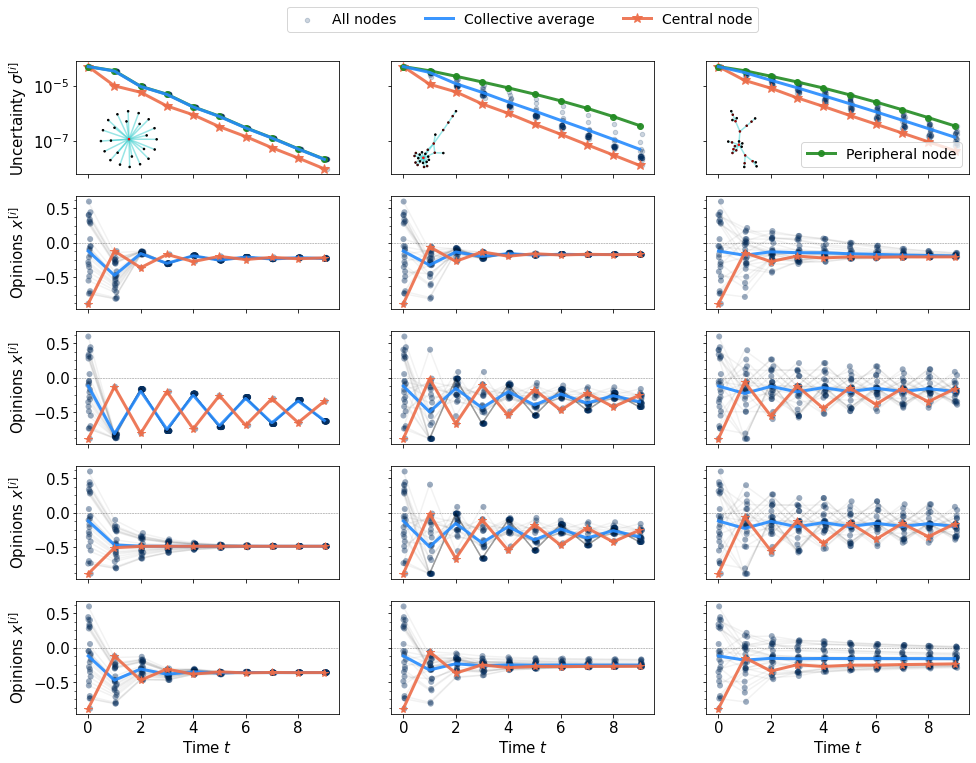

In [9]:
reload(postpro)

font_size_1 = 15
font_size_2 = 10 # font_size_1
plt.rcParams.update({'font.size': font_size_1})


fig, axs = plt.subplots(5, 3, figsize=(16, 12), sharey='row')

# axs[0, 1].set_title("Bayes")
default_path = ""
for i, experiment_folder_path in enumerate(experiment_folder_path_list_bayes):
    experiment_folder_path = default_path + "/" + experiment_folder_path
    df_tmp = postpro.post_pro_network_centrality_certainty(experiment_folder_path)
    
    ax = axs[0, i]
    if i == 0:
        plot_uncertainty_vs_time(df_tmp, ax=ax, fig=fig, legend_all=False, legend_single=False)
        ax.set_ylabel('Uncertainty $\sigma^{[i]}$')
    elif i == 1:
        plot_uncertainty_vs_time(df_tmp, ax=ax, fig=fig, legend_all=True, legend_single=False)
    else:
        plot_uncertainty_vs_time(df_tmp, ax=ax, fig=fig, legend_all=False, legend_single=True)

    # make an onset axis on the left bottom side of the plot
    axins = ax.inset_axes([-0.1, 0.01, 0.6, 0.6]);
    postpro.draw_network_color_nodes_on_degree(nx.from_numpy_array(df_tmp.adjc_time[0]), ax=axins, node_size_scale=0.02)
    axins.axis('square')


    ax = axs[1, i]
    if i == 0:
        plot_opinion_vs_time(df_tmp, ax=ax, fig=fig, legend=False)
        ax.set_ylabel('Opinions $x^{[i]}$')
    else:
        plot_opinion_vs_time(df_tmp, ax=ax, fig=fig, legend=False)


# axs[2, 1].set_title("Naive")
for i, experiment_folder_path in enumerate(experiment_folder_path_list_naiive):
    experiment_folder_path = default_path + "/" + experiment_folder_path
    df_tmp = postpro.post_pro_network_centrality_certainty(experiment_folder_path)
    ax = axs[2, i]
    plot_opinion_vs_time(df_tmp, ax=ax, fig=fig, legend=False)
    if i == 0:
        ax.set_ylabel('Opinions $x^{[i]}$')
    

for i, experiment_folder_path in enumerate(experiment_folder_path_list_naiive_GO):
    experiment_folder_path = default_path + "/" + experiment_folder_path
    df_tmp = postpro.post_pro_network_centrality_certainty(experiment_folder_path)
    ax = axs[3, i]
    plot_opinion_vs_time(df_tmp, ax=ax, fig=fig, legend=False)
    if i == 0:
        ax.set_ylabel('Opinions $x^{[i]}$')

for i, experiment_folder_path in enumerate(experiment_folder_path_list_LO):
    experiment_folder_path = default_path + "/" + experiment_folder_path
    df_tmp = postpro.post_pro_network_centrality_certainty(experiment_folder_path)
    ax = axs[4, i]
    plot_opinion_vs_time(df_tmp, ax=ax, fig=fig, legend=False, ticks=True)
    ax.set_xlabel('Time $t$')
    if i == 0:
        ax.set_ylabel('Opinions $x^{[i]}$')
    # axs[i+3, 2].set_title(experiment_name)

# make the y axis for the first row the same
axs[0, 0].set_ylim(axs[0, 1].get_ylim())
axs[0, 2].set_ylim(axs[0, 1].get_ylim())


fig.set_facecolor('white')


# save figure as pdf and png
# fig.savefig('exp_figures/' + 'alltogether_unsc_opinion.png', bbox_inches='tight', dpi=300)
# fig.savefig('exp_figures/' + 'alltogether_unsc_opinion.pdf', bbox_inches='tight', dpi=300)

# fig.savefig('exp_figures/' + 'alltogether_unsc_opinion_with_onsets_tighter.png', bbox_inches='tight', dpi=300)
# fig.savefig('exp_figures/' + 'alltogether_unsc_opinion_with_onsets_tighter.pdf', bbox_inches='tight', dpi=300)